In [1]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
import pandas as pd
from tqdm.notebook import tqdm
import os, re, math

In [2]:
output_dir = "./paper_plots"

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

def setup_plt():

    fig_width_pt = 220  # Get this from LaTeX using \showthe
    inches_per_pt = 1.0 / 72.27 * 2  # Convert pt to inches
    golden_mean = ((np.math.sqrt(5) - 1.0) / 2.0) * .8  # Aesthetic ratio
    fig_width = fig_width_pt * inches_per_pt  # width in inches
    fig_height = (fig_width * golden_mean)  # height in inches
    fig_size =  [fig_width, fig_height]

    plt_params = {
        'backend': 'ps',
        'axes.labelsize': 20,
        'legend.fontsize': 16,
        'xtick.labelsize': 18,
        'ytick.labelsize': 18,
        'font.size': 18,
        'figure.figsize': fig_size,
        'font.family': 'Times New Roman'
    }

    plt.rcParams.update(plt_params)
    plt.rc('pdf', fonttype=42)  # IMPORTANT to get rid of Type 3


n_weights  fixed_point_repr  l2_clientlarge_wellformed_ms  \
0      32768                16                       1896.75   
1     131072                16                       7603.50   
2     262144                16                      15214.75   
3     524288                16                      31224.00   

   l8_clientlarge_wellformed_ms  l8p_clientlarge_wellformed_ms  \
0                       1183.25                        1183.25   
1                       4740.50                        4740.50   
2                       9470.50                        9470.50   
3                      18924.75                       18924.75   

   l2_clientlarge_wellformed_ms_std  l8_clientlarge_wellformed_ms_std  \
0                          9.069179                          1.500000   
1                          3.109126                          2.516611   
2                         22.306576                          7.724420   
3                         71.865615                         23.528352   

   l8p_clientlarge_wellformed_ms_std  l2_server_wellformed_ms  \
0                           1.500000                   981.00   
1                           2.516611                  3917.50   
2                           7.724420                  7864.75   
3                          23.528352                 16242.25   

   l8_server_wellformed_ms  l8p_server_wellformed_ms  \
0                   596.25                    596.25   
1                  2385.50                   2385.50   
2                  4775.00                   4775.00   
3                  9556.00                   9556.00   

   l2_server_wellformed_ms_std  l8_server_wellformed_ms_std  \
0                     0.816497                     0.500000   
1                     1.732051                     3.316625   
2                    64.937791                     5.099020   
3                    44.709246                    17.068489   

   l8p_server_wellformed_ms_std  l2_clientlarge_range_ms  \
0                      0.500000                20516.125   
1                      3.316625                81857.000   
2                      5.099020               162837.375   
3                     17.068489               325728.750   

   l8_clientlarge_range_ms  l8p_clientlarge_range_ms  \
0                20501.125                    5096.0   
1                81803.000                    5096.0   
2               162732.375                    5096.0   
3               325520.750                    5096.0   

   l2_clientlarge_range_ms_std  l8_clientlarge_range_ms_std  \
0                    53.018696                    53.018696   
1                   342.983132                   342.983132   
2                   457.787205                   457.787205   
3                   543.314366                   543.314366   

   l8p_clientlarge_range_ms_std  l2_server_range_ms  l8_server_range_ms  \
0                     36.687873           11314.750           11313.750   
1                     36.687873           45257.625           45256.625   
2                     36.687873           90334.250           90333.250   
3                     36.687873          180648.500          180647.500   

   l8p_server_range_ms  l2_server_range_ms_std  l8_server_range_ms_std  \
0              2814.75               28.907488               28.907488   
1              2814.75              112.558477              112.558477   
2              2814.75              112.763659              112.763659   
3              2814.75              259.814219              259.814219   

   l8p_server_range_ms_std  l2_server_caggregation_ms  \
0                15.649814                     161.25   
1                15.649814                     645.50   
2                15.649814                    1289.75   
3                15.649814                    2582.50   

   l8_server_caggregation_ms  l8p_server_caggregation_ms  \
0                     161.25                      161.25   
1          

Server Overall - Discrete Log Reconstruction:


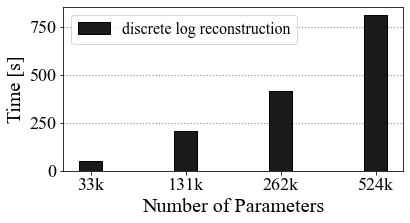


Server per Client - Zero Knowledge Proofs + Aggregation:


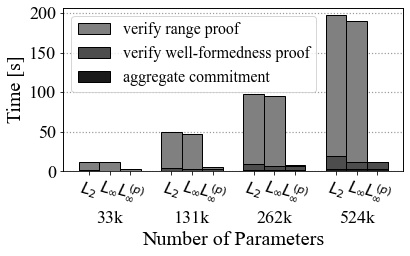


Client Large - Zero Knowledge Proofs:


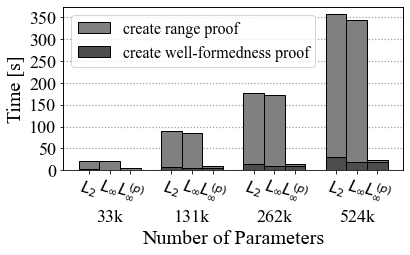


Client Small - Zero Knowledge Proofs:


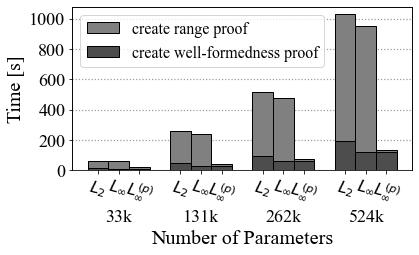

In [3]:

# build benchmarks

cagg_config = {
    "server_label": "aggregate commitment",
    "color": "0.1"
}
wellformed_config = {
    "client_label": "create well-formedness proof",
    "server_label": "verify well-formedness proof",
    "color": "0.3"
}
range_config = {
    "client_label": "create range proof",
    "server_label": "verify range proof",
    "color": "0.5"
}



def extract(filename, pattern, label, data_dir, fixed_point_repr=None):
    # pattern group(1) represents fixed_point_repr
    # pattern group(2) represents n_weights

    lst = []
    match = re.search(pattern, filename, re.IGNORECASE)
    if match:
        # extract the weight parameter and the fp-repr
        group1 = int(match.group(1))

        if fixed_point_repr is None:
            fixed_point_repr = group1
            n_weights = int(match.group(2))
        else:
            fixed_point_repr = fixed_point_repr
            n_weights = group1

        
        # read the benchmark result file
        with open(f"{data_dir}/{filename}", "r") as f:
            lines = f.readlines()
            results =  [int(x) for x in lines]
        
        # go through results and write dicts 
        for i, result in enumerate(results):
            d = {
                "repetition": i,
                "fixed_point_repr" : fixed_point_repr,
                "n_weights": n_weights,
                label: result
            }               

            lst.append(d)
    
    return lst
    


def build_df_mbench_computation():

    df1 = _build_df_mbench_computation(data_dir="./../robust-secure-aggregation/benchmarks_paper/large", cmachine="clientlarge", run_server=True)
    df2 = _build_df_mbench_computation(data_dir="./../robust-secure-aggregation/benchmarks_paper/small", cmachine="clientsmall", run_server=False)

    df = df1.merge(df2)

    return df


def _build_df_mbench_computation(data_dir, cmachine, run_server):

    # 1st loop over all files in folder
    l1 = []
    l2 = []
    l3 = []
    l4 = []
    l5 = []
    l6 = []
    l7 = []
    l8 = []
    l9 = []
    l10 = []

    for filename in os.listdir(data_dir):

        # extract randproof
        pattern = "create-paper-randproof-([0-9]+)-([0-9]+)-.*.bench"
        lst1 = extract(filename=filename, pattern=pattern, label="create_randproof_ms", data_dir=data_dir)
        l1 += lst1

        if run_server:
            pattern = "verify-paper-randproof-([0-9]+)-([0-9]+)-.*.bench"
            lst2 = extract(filename=filename, pattern=pattern, label="verify_randproof_ms", data_dir=data_dir)
            l2 += lst2

        # extract rangeproof
        pattern = "create-paper-rangeproof-([0-9]+)-[0-9]+-([0-9]+)-.*.bench"
        lst3 = extract(filename=filename, pattern=pattern, label="create_rangeproof_ms", data_dir=data_dir)
        l3 += lst3

        if run_server:
            pattern = "verify-paper-rangeproof-([0-9]+)-[0-9]+-([0-9]+)-.*.bench"
            lst4 = extract(filename=filename, pattern=pattern, label="verify_rangeproof_ms", data_dir=data_dir)
            l4 += lst4

        # extract rangeproof l2
        pattern = "create-paper-rangeproof-l2-([0-9]+)-[0-9]+-([0-9]+)-.*.bench"
        lst5 = extract(filename=filename, pattern=pattern, label="create_rangeproofl2_ms", data_dir=data_dir)
        l5 += lst5

        if run_server:
            pattern = "verify-paper-rangeproof-l2-([0-9]+)-[0-9]+-([0-9]+)-.*.bench"
            lst6 = extract(filename=filename, pattern=pattern, label="verify_rangeproofl2_ms", data_dir=data_dir)
            l6 += lst6

        # extract squarerandproof
        pattern = "create-paper-squarerandproof-([0-9]+)-([0-9]+)-.*.bench"
        lst7 = extract(filename=filename, pattern=pattern, label="create_squarerandproof_ms", data_dir=data_dir)
        l7 += lst7

        if run_server:
            pattern = "verify-paper-squarerandproof-([0-9]+)-([0-9]+)-.*.bench"
            lst8 = extract(filename=filename, pattern=pattern, label="verify_squarerandproof_ms", data_dir=data_dir)
            l8 += lst8

        if run_server:
            # extract discrete log
            pattern = "bench_paper_dlog2-([0-9]+)-16-([0-9]+)-.*.bench"
            lst9 = extract(filename=filename, pattern=pattern, label="dlog2_ms", data_dir=data_dir)
            l9 += lst9

            # extract el gamal addition
            pattern = "bench_paper_addelgamal-([0-9]+)-.*.bench"
            lst10 = extract(filename=filename, pattern=pattern, label="elgamal_add_ms", data_dir=data_dir, fixed_point_repr=16)
            l10 += lst10



    # Combine Data from Different Experiments in separate Columns
    df = pd.DataFrame(l1)
    df = df.merge(pd.DataFrame(l3), how="outer")
    df = df.merge(pd.DataFrame(l5), how="outer")
    df = df.merge(pd.DataFrame(l7), how="outer")

    if run_server:
         df = df.merge(pd.DataFrame(l2), how="outer")
         df = df.merge(pd.DataFrame(l4), how="outer")
         df = df.merge(pd.DataFrame(l6), how="outer")
         df = df.merge(pd.DataFrame(l8), how="outer")
         df = df.merge(pd.DataFrame(l9), how="outer")
         df = df.merge(pd.DataFrame(l10), how="outer")


    df = df.sort_values(["fixed_point_repr", "n_weights", "repetition"])


    agg_client_d = {
        'create_randproof_ms':['mean', 'var', 'count'],
        'create_rangeproof_ms':['mean', 'var', 'count'],
        'create_rangeproofl2_ms':['mean', 'var', 'count'],
        'create_squarerandproof_ms':['mean', 'var', 'count'],
    }

    agg_server_d = {
        'verify_randproof_ms':['mean', 'var', 'count'],
        'verify_rangeproof_ms':['mean', 'var', 'count'],
        'verify_rangeproofl2_ms':['mean', 'var', 'count'],
        'verify_squarerandproof_ms':['mean', 'var', 'count'],
        'dlog2_ms': ['mean', 'var', 'count'],
        'elgamal_add_ms': ['mean', 'var', 'count']
    }

    if run_server:
        agg_d = {**agg_client_d, **agg_server_d}
    else:
        agg_d = agg_client_d


    # Aggregate Repetitions into Mean and variance
    df = df.groupby(["fixed_point_repr", "n_weights"], as_index=False).agg(agg_d)

    # convert to flat df
    df.columns = ['_'.join(tup).rstrip('_') for tup in df.columns.values]

    # Construct relevant metrics

    # client wellformedness
    df[f"l2_{cmachine}_wellformed_ms"] = df["create_squarerandproof_ms_mean"]
    df[f"l8_{cmachine}_wellformed_ms"] = df["create_randproof_ms_mean"]
    df[f"l8p_{cmachine}_wellformed_ms"] = df["create_randproof_ms_mean"]

    df[f"l2_{cmachine}_wellformed_ms_std"] = np.sqrt(df["create_squarerandproof_ms_var"])
    df[f"l8_{cmachine}_wellformed_ms_std"] = np.sqrt(df["create_randproof_ms_var"])
    df[f"l8p_{cmachine}_wellformed_ms_std"] = np.sqrt(df["create_randproof_ms_var"])
    
    # server wellformedness
    if run_server:
        df["l2_server_wellformed_ms"] = df["verify_squarerandproof_ms_mean"]
        df["l8_server_wellformed_ms"] = df["verify_randproof_ms_mean"]
        df["l8p_server_wellformed_ms"] = df["verify_randproof_ms_mean"]

        df["l2_server_wellformed_ms_std"] = np.sqrt(df["verify_squarerandproof_ms_var"])
        df["l8_server_wellformed_ms_std"] = np.sqrt(df["verify_randproof_ms_var"])
        df["l8p_server_wellformed_ms_std"] = np.sqrt(df["verify_randproof_ms_var"])

    # client range
    df[f"l2_{cmachine}_range_ms"] = df["create_rangeproofl2_ms_mean"] + df["create_rangeproof_ms_mean"]
    df[f"l8_{cmachine}_range_ms"] = df["create_rangeproof_ms_mean"]
    df[f"l8p_{cmachine}_range_ms"] = df[df["n_weights"] == 8192]["create_rangeproof_ms_mean"].values[0]

    df[f"l2_{cmachine}_range_ms_std"] = np.sqrt(df["create_rangeproofl2_ms_var"] + df["create_rangeproof_ms_var"])
    df[f"l8_{cmachine}_range_ms_std"] = np.sqrt(df["create_rangeproof_ms_var"])
    df[f"l8p_{cmachine}_range_ms_std"] = np.sqrt(df[df["n_weights"] == 8192]["create_rangeproof_ms_var"].values[0])

    # server range
    if run_server:
        df["l2_server_range_ms"] = df["verify_rangeproofl2_ms_mean"] + df["verify_rangeproof_ms_mean"]
        df["l8_server_range_ms"] = df["verify_rangeproof_ms_mean"]
        df["l8p_server_range_ms"] = df[df["n_weights"] == 8192]["verify_rangeproof_ms_mean"].values[0]

        df["l2_server_range_ms_std"] = np.sqrt(df["verify_rangeproofl2_ms_var"] + df["verify_rangeproof_ms_var"])
        df["l8_server_range_ms_std"] = np.sqrt(df["verify_rangeproof_ms_var"])
        df["l8p_server_range_ms_std"] = np.sqrt(df[df["n_weights"] == 8192]["verify_rangeproof_ms_var"].values[0])

    # el gamal aggregation
    if run_server:
        df["l2_server_caggregation_ms"] = df["elgamal_add_ms_mean"]
        df["l8_server_caggregation_ms"] = df["elgamal_add_ms_mean"]
        df["l8p_server_caggregation_ms"] = df["elgamal_add_ms_mean"]

        df["l2_server_caggregation_ms_std"] = np.sqrt(df["elgamal_add_ms_var"])
        df["l8_server_caggregation_ms_std"] = np.sqrt(df["elgamal_add_ms_var"])
        df["l8p_server_caggregation_ms_std"] = np.sqrt(df["elgamal_add_ms_var"])

    # log2 reconstruction
    if run_server:
        df["server_log2reconstruct_ms"] = df["dlog2_ms_mean"]
        df["server_log2reconstruct_ms_std"] = np.sqrt(df["dlog2_ms_var"])


    # filter out the probabilistic checking
    df = df[df["n_weights"]!=8192]

    # project to new columns
    cols = ["n_weights", "fixed_point_repr"]
    new_cols = [col for col in df.columns.values if col.startswith("l2_") or col.startswith("l8_") or col.startswith("l8p_")]
    cols += new_cols 
    if run_server:
        cols += ["server_log2reconstruct_ms", "server_log2reconstruct_ms_std"]
    df = df[cols]


    return df


def format_plot_computation(ax, ind, width, group_labels, ytick_step=50):
    ##########################
    # General Format         
    ##########################
    #ax.set_title("Hello World")

    def legend_without_duplicate_labels(ax):
        handles, labels = ax.get_legend_handles_labels()
        unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
        ax.legend(*zip(*unique), loc="best") # 'best', 'upper right', 'upper left', 'lower left', 
                                                # 'lower right', 'right', 'center left',  'center right',
                                                # 'lower center', 'upper center', 'center'
    legend_without_duplicate_labels(ax)

    ax.grid(True, axis="y", linestyle=':', color='0.6', zorder=0, linewidth=1.2)
    
    ##########################
    # Y - Axis Format
    ##########################
    ax.set_ylim(ymin=0, ymax=None)
    ax.set_ylabel("Time [s]")

    ymax = ax.get_ylim()[1]
    ax.set_yticks(np.arange(0, ymax, ytick_step))
    
    ##########################
    # X - Axis Format
    ##########################

    # add 1st axis for norm (l2, l8, l8p)
    xticks = np.append(ind, ind-width, axis=0)
    xticks = np.append(xticks, ind+width, axis=0)
    xticks = np.sort(xticks)
    labels = 4 * ["$L_2$", "$L_{\infty}$", "$L_{\infty}^{(p)}$"]
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels, fontsize=16, rotation=345)


    # add 2nd axis for number of parameters
    ax2 = ax.twiny()
    ax2.set_xticks(ind)
    # $(2^{{{int(math.log(n_weights,2))}}})$
    group_labels = [f"{round(n_weights/1000)}k" for n_weights in group_labels]
    ax2.set_xticklabels(group_labels, rotation=345)
    ax2.xaxis.set_ticks_position('bottom') 
    ax2.xaxis.set_label_position('bottom')
    ax2.spines['bottom'].set_position(('outward', 36))
    
    ax2.set_xlabel('Number of Parameters')
    ax2.set_xlim(ax.get_xlim())
    ax2.tick_params(axis='both', which='both', length=0)
    ax2.spines['bottom'].set_visible(False)
 

def build_fig_mbench_computation_server_perclient_zkp(df, name="mbench_computation_server_perclient_zkp"):
    setup_plt()


    with PdfPages(f"{output_dir}/{name}.pdf") as pdf:
   
        fig, ax = plt.subplots()

        ##########################
        # Draw all the lines         
        ##########################

        # build ind, width
        ind = np.arange(0, len(df.index)) * 1.2
        width = 0.3  # the width of the bars
    

        # build the barcharts

        for offset, norm in zip([-width, 0, width], ["l2", "l8", "l8p"]):

            ax.bar(ind+offset, df[f"{norm}_server_range_ms"] / 1000, width, 
                        bottom=df[f"{norm}_server_wellformed_ms"] / 1000, label=range_config["server_label"], 
                        color=range_config["color"], edgecolor="black", zorder=2)

            ax.bar(ind+offset, df[f"{norm}_server_wellformed_ms"] / 1000, width, 
                        bottom=df[f"{norm}_server_caggregation_ms"] / 1000, label=wellformed_config["server_label"], 
                        color=wellformed_config["color"], edgecolor="black", zorder=2)

            ax.bar(ind+offset, df[f"{norm}_server_caggregation_ms"] / 1000, width, 
                        bottom=None, label=cagg_config["server_label"], 
                        color=cagg_config["color"], edgecolor="black", zorder=2)
            
            

        # format the computation barchart
        format_plot_computation(ax, ind, width, df["n_weights"])

        
        pdf.savefig(bbox_inches='tight', pad_inches=0)
        plt.close()
    return fig


def build_fig_mbench_computation_client_zkp(df, clientsuffix="small"):

    machine = f"client{clientsuffix}"
    name= f"mbench_computation_{machine}_zkp"

    setup_plt()

    with PdfPages(f"{output_dir}/{name}.pdf") as pdf:
   
        fig, ax = plt.subplots()

        ##########################
        # Draw all the lines         
        ##########################

        # build ind, width
        ind = np.arange(0, len(df.index)) * 1.2
        width = 0.3  # the width of the bars
    

        # build the barcharts

        for offset, norm in zip([-width, 0, width], ["l2", "l8", "l8p"]):

            ax.bar(ind+offset, df[f"{norm}_{machine}_range_ms"] / 1000, width, 
                        bottom=df[f"{norm}_{machine}_wellformed_ms"] / 1000, label=range_config["client_label"], 
                        color=range_config["color"], edgecolor="black", zorder=2)

            ax.bar(ind+offset, df[f"{norm}_{machine}_wellformed_ms"] / 1000, width, 
                        bottom=None, label=wellformed_config["client_label"], 
                        color=wellformed_config["color"], edgecolor="black", zorder=2)

            
        if clientsuffix == "small":
            ytick_step=200
        else:
            ytick_step=50

        # format the computation barchart
        format_plot_computation(ax, ind, width, df["n_weights"], ytick_step=ytick_step)

        
        pdf.savefig(bbox_inches='tight', pad_inches=0)
        plt.close()
    return fig

def build_fig_mbench_computation_server_dlog(df, name="mbench_computation_server_dlog"):

    label = "discrete log reconstruction"
    color = "0.1"
    setup_plt()

    with PdfPages(f"{output_dir}/{name}.pdf") as pdf:
   
        fig, ax = plt.subplots()

        ##########################
        # Draw all the lines         
        ##########################

        # build ind, width
        ind = np.arange(0, len(df.index)) * 1.2
        width = 0.3  # the width of the bars

        ax.bar(ind, df["server_log2reconstruct_ms"] / 1000, width, 
                        label=label, color=color, edgecolor="black", zorder=2)


        ##########################
        # General Format         
        ##########################
        #ax.set_title("Hello World")
        ax.legend(loc="best")   # 'best', 'upper right', 'upper left', 'lower left', 
                                # 'lower right', 'right', 'center left',  'center right', 
                                # 'lower center', 'upper center', 'center'
        ax.grid(True, axis="y", linestyle=':', color='0.6', zorder=0, linewidth=1.2)


        ##########################
        # Y - Axis Format
        ##########################
        ax.set_ylim(ymin=0, ymax=None)
        ax.set_ylabel("Time [s]")
        #ax.set_yticks(yticks)
        #ax.set_yticklabels(labels, fontsize=16, rotation=345)


        ##########################
        # X - Axis Format
        ##########################
        #ax.set_xlim(xmin=0, xmax=None)
        ax.set_xlabel("Number of Parameters")
        ax.set_xticks(ind)
        labels = [f"{round(x/1000)}k" for x in df["n_weights"]]
        ax.set_xticklabels(labels)

        #labels = 4 * ["$L_2$", "$L_{\infty}$", "$L_{\infty}^{(p)}$"]
        #ax.set_xticks(xticks)
        #ax.set_xticklabels(labels, fontsize=16, rotation=345)

        pdf.savefig(bbox_inches='tight', pad_inches=0)
        plt.close()
    return fig


df = build_df_mbench_computation()
df.to_csv("full_including_smallclient.csv")
display(df)



fig_mbench_computation_server_dlog = build_fig_mbench_computation_server_dlog(df)
print("Server Overall - Discrete Log Reconstruction:")
display(fig_mbench_computation_server_dlog)

fig_mbench_computation_server_perclient_zkp = build_fig_mbench_computation_server_perclient_zkp(df)
print("\nServer per Client - Zero Knowledge Proofs + Aggregation:")
display(fig_mbench_computation_server_perclient_zkp)

fig_mbench_computation_clientlarge_zkp = build_fig_mbench_computation_client_zkp(df, "large")
print("\nClient Large - Zero Knowledge Proofs:")
display(fig_mbench_computation_clientlarge_zkp)


print("\nClient Small - Zero Knowledge Proofs:")
fig_mbench_computation_clientsmall_zkp = build_fig_mbench_computation_client_zkp(df, "small")
display(fig_mbench_computation_clientsmall_zkp)





L8 Bandwidth (infinity norm):


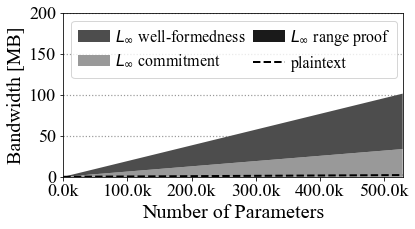


L2 Bandwidth:


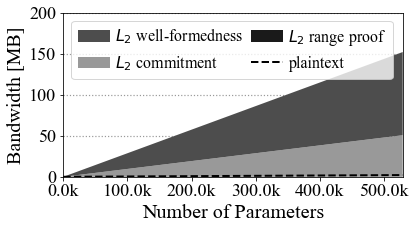

n_weights  proving_bit_range  n_vector_segments  group_element_bytes  \
0            1                  8                  4                   32   
8         4241                  8                  4                   32   
16        8481                  8                  4                   32   
24       12721                  8                  4                   32   
32       16961                  8                  4                   32   
40       21201                  8                  4                   32   
48       25441                  8                  4                   32   
56       29681                  8                  4                   32   
64       33921                  8                  4                   32   
72       38161                  8                  4                   32   
80       42401                  8                  4                   32   
88       46641                  8                  4                   32   
96       50881                  8                  4                   32   
104      55121                  8                  4                   32   
112      59361                  8                  4                   32   
120      63601                  8                  4                   32   
128      67841                  8                  4                   32   
136      72081                  8                  4                   32   
144      76321                  8                  4                   32   
152      80561                  8                  4                   32   
160      84801                  8                  4                   32   
168      89041                  8                  4                   32   
176      93281                  8                  4                   32   
184      97521                  8                  4                   32   
192     101761                  8                  4                   32   
200     106001                  8                  4                   32   
208     110241                  8                  4                   32   
216     114481                  8                  4                   32   
224     118721                  8                  4                   32   
232     122961                  8                  4                   32   
240     127201                  8                  4                   32   
248     131441                  8                  4                   32   
256     135681                  8                  4                   32   
264     139921                  8                  4                   32   
272     144161                  8                  4                   32   
280     148401                  8                  4                   32   
288     152641                  8                  4                   32   
296     156881                  8                  4                   32   
304     161121                  8                  4                   32   
312     165361                  8                  4                   32   
320     169601                  8                  4                   32   
328     173841                  8                  4                   32   
336     178081                  8                  4                   32   
344     182321                  8                  4                   32   
352     186561                  8                  4                   32   
360     190801                  8                  4                   32   
368     195041                  8                  4                   32   
376     199281                  8                  4                   32   
384     203521                  8                  4                   32   
392     207761                  8                  4                   32   
400     212001                  8                  4                   32   
4

In [4]:
# Bandwidth

def build_df_bandwidth(max_n_weights=10**6):
    
    n_steps = 1000
    step_size = int(max_n_weights / 1000)

    message_sizes = []
    for n_weights in range(1, max_n_weights, step_size):
        d = get_message_size(n_weights)
        message_sizes.append(d)

    df = pd.DataFrame(message_sizes)

    df["l2_total_mb"] = (df["l2_commitment_bytes"] + df["l2_wellformedness_bytes"] + df["l2_range_proof_bytes"]) * 1e-6
    df["l8_total_mb"] = (df["l8_commitment_bytes"] + df["l8_wellformedness_bytes"] + df["l8_range_proof_bytes"]) * 1e-6

    return df

def get_message_size(n_weights, proving_bit_range=8, n_vector_segments=4, group_element_bytes=32, scalar_bytes=32, plaintext_weight_bytes=4):    

    # n_weights: D
    # proving_bit_range: n
    # n_vector_segments: p

    d = {
        "n_weights": n_weights,
        "proving_bit_range": proving_bit_range,
        "n_vector_segments": n_vector_segments,
        "group_element_bytes": group_element_bytes,
        "scalar_bytes": scalar_bytes
    }


    d["plaintext_bytes"] = plaintext_weight_bytes * n_weights

    

    ###############################################################
    ## Commitments                                               ##
    ###############################################################

    # L8 / L8p
    d["l8_commitment_bytes"] = n_weights * 2 * group_element_bytes

    # L2: requires additional commitment to the squared parameters 
    # (pederson commitment => 1 group element per weight)
    d["l2_commitment_bytes"] = d["l8_commitment_bytes"] + n_weights * group_element_bytes
   
    
    ###############################################################
    ## Well-Formedness Proof                                     ##
    ###############################################################

    # L8 / L8p
    d["l8_wellformedness_bytes"] = (2 * scalar_bytes + 2 * group_element_bytes) * n_weights

    # L2: requires one additional scalar and group element for the square relation proof
    d["l2_wellformedness_bytes"] = d["l8_wellformedness_bytes"] + (scalar_bytes + group_element_bytes) * n_weights


    ###############################################################
    ## Range Proofs                                              ##
    ###############################################################   

    def next_pow(x):
        return pow(2, math.ceil(math.log(x, 2)))

    # L8 / L8p
    n_group_elements = 2 * (math.log(proving_bit_range, 2) + math.log(next_pow(n_weights / n_vector_segments), 2)) + 4
    n_scalars = 5
    d["l8_range_proof_bytes"] = n_group_elements * group_element_bytes + n_scalars * scalar_bytes

    # L2: requires additional group elements and scalars to proof that l2 norm is in range
    n_group_elements_additional  = math.log(proving_bit_range, 2) + 4
    n_scalars_additional = 5
    d["l2_range_proof_bytes"] = d["l8_range_proof_bytes"] + n_group_elements_additional * group_element_bytes + n_scalars_additional * scalar_bytes

    return d



def build_fig_mbench_bandwidth_perclient(df, norm):

    name = f"mbench_bandwidth_perclient_{norm}"

    if norm not in ["l2", "l8"]:
        raise ValueError("unknown norm")

    if norm == "l2":
        label_prefix = "$L_2$"
    else:
        label_prefix = "$L_{\infty}$"

    
    setup_plt()

    with PdfPages(f"{output_dir}/{name}.pdf") as pdf:
   
        fig, ax = plt.subplots()

        ##########################
        # Draw all the lines         
        ##########################

        ax.plot(df["n_weights"], df["plaintext_bytes"]*1e-6, label="plaintext", color="0.0", linestyle="--", linewidth=2)

        ax.stackplot(df["n_weights"], 
                    df[norm + "_commitment_bytes"]*1e-6, 
                    df[norm + "_wellformedness_bytes"]*1e-6, 
                    df[norm + "_range_proof_bytes"]*1e-6, 
                    colors=["0.6", "0.3", "0.1"], labels=[label_prefix + " commitment", label_prefix + " well-formedness", label_prefix + " range proof"], zorder=2)



        ##########################
        # General Format         
        ##########################
        #ax.set_title("Hello World")

        handles, labels = plt.gca().get_legend_handles_labels()
        order = [2,1,3,0]

        ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc="upper left", ncol=2, handletextpad=0.3, columnspacing=0.5)   # 'best', 'upper right', 'upper left', 'lower left', 
                                # 'lower right', 'right', 'center left',  'center right', 
                                # 'lower center', 'upper center', 'center'
        ax.grid(True, axis="y", linestyle=':', color='0.6', zorder=0, linewidth=1.2)


        ##########################
        # Y - Axis Format
        ##########################
        ax.set_ylim(ymin=0, ymax=200)
        ax.set_ylabel("Bandwidth [MB]")
        #ax.set_yticks(yticks)
        #ax.set_yticklabels(labels, fontsize=16, rotation=345)


        ##########################
        # X - Axis Format
        ##########################
        ax.set_xlim(xmin=0, xmax=530000)
        ax.set_xlabel("Number of Parameters")

        xlabels = [f"{round(x)}k" if x < 1000 else f"{round(x/1000)}M" for x in ax.get_xticks()/1000]
        ax.set_xticklabels(xlabels)

        pdf.savefig(bbox_inches='tight', pad_inches=0)
        plt.close()
    return fig


df = build_df_bandwidth(max_n_weights=530000)


fig_mbench_bandwidth_perclient_l8 = build_fig_mbench_bandwidth_perclient(df, norm="l8")
print("L8 Bandwidth (infinity norm):")
display(fig_mbench_bandwidth_perclient_l8)

fig_mbench_bandwidth_perclient_l2 = build_fig_mbench_bandwidth_perclient(df, norm="l2")
print("\nL2 Bandwidth:")
display(fig_mbench_bandwidth_perclient_l2)

display(df[df.index % 8 == 0])





Probabilistic Checking:


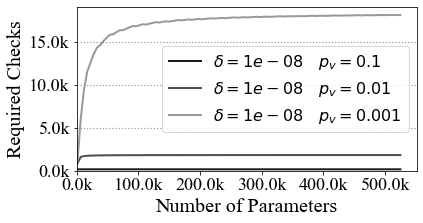

fail_prob_bound=1e-08 	 prob_weights_violating_bound=0.1
(n_weights, n_checks): [(1000, 160), (6290, 173), (11580, 174), (16870, 174), (22160, 175), (27450, 175), (32740, 175), (38030, 175), (43320, 175), (48610, 175), (53900, 175), (59190, 175), (64480, 175), (69770, 175), (75060, 175), (80350, 175), (85640, 175), (90930, 175), (96220, 175), (101510, 175), (106800, 175), (112090, 175), (117380, 175), (122670, 175), (127960, 175), (133250, 175), (138540, 175), (143830, 175), (149120, 175), (154410, 175), (159700, 175), (164990, 175), (170280, 175), (175570, 175), (180860, 175), (186150, 175), (191440, 175), (196730, 175), (202020, 175), (207310, 175), (212600, 175), (217890, 175), (223180, 175), (228470, 175), (233760, 175), (239050, 175), (244340, 175), (249630, 175), (254920, 175), (260210, 175), (265500, 175), (270790, 175), (276080, 175), (281370, 175), (286660, 175), (291950, 175), (297240, 175), (302530, 175), (307820, 175), (313110, 175), (318400, 175), (323690, 175), (328980, 1

In [5]:
# Probabilistic Checking

def detection_prop_hypergeometric(n_weights, n_weights_violating_bound, n_bounds_check):
    # probability that by sampling {n_bounds_check} weights without replacement from all the {n_weights} weights
    # we get k=0 of the {n_weights_violating_bound} weights that violate the bound
    hpd = ss.hypergeom(n_weights, n_weights_violating_bound, n_bounds_check)
    k = 0
    p = hpd.pmf(k)

    # probability that we get at least one of the weights violating the bound
    return 1 - p


def binary_search_nchecks(success_prob_bound, n_weights, n_weights_violating_bound):
    mid = 0
    start = 0
    end = n_weights # 10000 # upper bound
    step = 0
    success = None
    while (start <= end):
        mid = (start + end) // 2
        
        prob = detection_prop_hypergeometric(n_weights=n_weights, n_weights_violating_bound=n_weights_violating_bound, n_bounds_check=mid)
        #print(f"Check mid={mid}  prob={prob}")

        if prob < success_prob_bound:
            # checking {mid} parameters not sufficient => increase the number of checks
            start = mid + 1
        else:
            # checking {mid} parameters, results in success probability above the bound => check if reducing number of checks still works
            success = (mid, prob)
            end = mid - 1

    if success is None:
        raise ValueError("did not find satisfiable number of checks")
    return success

def build_prob_checking_data():
    lines = []

    x_min = 1000
    x_max = 530000

    n_steps = 100
    step_size = int((x_max-x_min)/n_steps)
    
    for fail_prob_bound, linestyle in tqdm(zip([1e-8], ['-'])): #, 1e-9


        success_prob_bound = 1 - fail_prob_bound
        for prob_weights_violating_bound, color in tqdm(zip([0.1, 0.01, 0.001], ['0.1', '0.3','0.6'])):

            labels = range(x_min, x_max, step_size)
            values = []
            for n_weights in tqdm(labels, leave=False):
                n_weights_violating_bound = int(prob_weights_violating_bound * n_weights)
                s = binary_search_nchecks(success_prob_bound=success_prob_bound, n_weights=n_weights, n_weights_violating_bound=n_weights_violating_bound)
                n_checks = s[0]
                values.append(n_checks)
            d = {
                "fail_prob_bound": fail_prob_bound,
                "success_prob_bound": success_prob_bound,
                "prob_weights_violating_bound": prob_weights_violating_bound,
                #"n_weights_violating_bound": n_weights_violating_bound,
                "labels (n_weights)": labels,
                "values (n_checks)": values,
                "color": color,
                "linestyle": linestyle
            }
            lines.append(d)

    return lines

def build_fig_pcheck_num_required_checks(lines, name="pcheck_num_required_checks"):

    setup_plt()

    with PdfPages(f"{output_dir}/{name}.pdf") as pdf:
   
        fig, ax = plt.subplots()

        ##########################
        # Draw all the lines         
        ##########################

        # lineplot
        for line in lines:

            fail_prob_bound = line["fail_prob_bound"]
            prob_weights_violating_bound = line["prob_weights_violating_bound"]
            label = f"$\delta = {fail_prob_bound}$    $p_v = {prob_weights_violating_bound}$"
            plt.plot(line["labels (n_weights)"], line["values (n_checks)"], label=label, color=line["color"], linestyle=line["linestyle"], linewidth=2)

        ##########################
        # General Format         
        ##########################
        #ax.set_title("Hello World")
        ax.legend(loc="best")   # 'best', 'upper right', 'upper left', 'lower left', 
                                # 'lower right', 'right', 'center left',  'center right', 
                                # 'lower center', 'upper center', 'center'
        ax.grid(True, axis="y", linestyle=':', color='0.6', zorder=0, linewidth=1.2)

        ##########################
        # Y - Axis Format
        ##########################
        ax.set_ylim(ymin=0, ymax=None)
        ax.set_ylabel("Required Checks")
        #ax.set_yticks(yticks)
        ylabels = [f"{round(y)}k" for y in ax.get_yticks()/1000]
        ax.set_yticklabels(ylabels)

        ##########################
        # X - Axis Format
        ##########################
        ax.set_xlim(xmin=0, xmax=None)
        ax.set_xlabel("Number of Parameters")
        #ax.set_xticks(xticks)
        xlabels = [f"{round(x)}k" for x in ax.get_xticks()/1000]
        ax.set_xticklabels(xlabels)

        pdf.savefig(bbox_inches='tight', pad_inches=0)
        plt.close()
    return fig



lines = build_prob_checking_data()

fig_pcheck_num_required_checks = build_fig_pcheck_num_required_checks(lines)

print("Probabilistic Checking:")
display(fig_pcheck_num_required_checks)

# print data
for line in lines:
    print(f"fail_prob_bound={line['fail_prob_bound']} \t prob_weights_violating_bound={line['prob_weights_violating_bound']}")

    lst = [(label, value) for label, value in zip(line["labels (n_weights)"], line["values (n_checks)"])]
    
    print(f"(n_weights, n_checks): {lst}")
    print("====================\n")

In [6]:

n_weights = 273066
p_v = 0.005
checks = binary_search_nchecks(success_prob_bound=1-1e-8, n_weights=n_weights, n_weights_violating_bound=int(p_v*n_weights))
print(checks)




(3652, 0.9999999900443916)


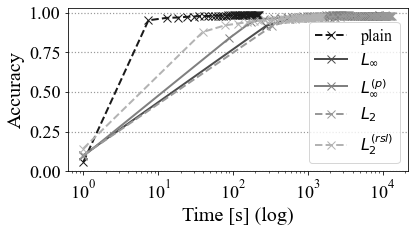

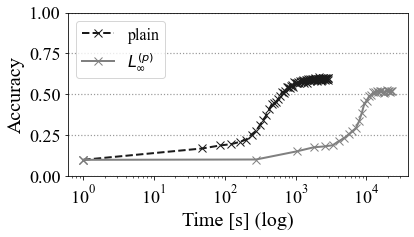

epoch    loss_u  accuracy_u    time_u   cumtime_u   loss_l8  accuracy_l8  \
0       0  2.320262      0.0574  1.000000    1.000000  2.336624       0.1002   
1       1  0.172427      0.9516  6.430499    7.430499  0.282723       0.9173   
2       2  0.113188      0.9671  5.622920   13.053419  0.138087       0.9589   
3       3  0.098994      0.9693  5.591158   18.644578  0.113191       0.9672   
4       4  0.091006      0.9736  5.601222   24.245800  0.100314       0.9694   
5       5  0.084292      0.9753  5.598727   29.844527  0.090484       0.9719   
6       6  0.081022      0.9780  5.583597   35.428124  0.087058       0.9738   
7       7  0.077538      0.9783  5.581203   41.009326  0.082481       0.9756   
8       8  0.073688      0.9789  5.581732   46.591059  0.076003       0.9756   
9       9  0.072065      0.9795  5.580852   52.171911  0.076308       0.9764   
10     10  0.070448      0.9800  5.578722   57.750632  0.074025       0.9784   
11     11  0.067326      0.9805  5.589051   63.339683  0.072704       0.9781   
12     12  0.067427      0.9807  5.581822   68.921505  0.073284       0.9780   
13     13  0.065018      0.9816  5.592790   74.514295  0.072383       0.9791   
14     14  0.064446      0.9815  5.584754   80.099049  0.070933       0.9792   
15     15  0.062901      0.9828  5.584027   85.683076  0.069838       0.9797   
16     16  0.062206      0.9824  5.572957   91.256033  0.070520       0.9797   
17     17  0.060311      0.9834  5.593300   96.849333  0.069024       0.9803   
18     18  0.060632      0.9828  5.573396  102.422729  0.069937       0.9800   
19     19  0.060844      0.9838  5.583906  108.006635  0.070164       0.9799   
20     20  0.060537      0.9834  5.599164  113.605798  0.069507       0.9803   
21     21  0.058019      0.9840  5.579161  119.184959  0.069454       0.9806   
22     22  0.058680      0.9841  5.565465  124.750424  0.068718       0.9802   
23     23  0.058547      0.9847  5.568216  130.318641  0.070461       0.9804   
24     24  0.058396      0.9841  5.624129  135.942770  0.070088       0.9809   
25     25  0.058283      0.9845  5.570822  141.513592  0.071256       0.9802   
26     26  0.059216      0.9843  5.579549  147.093141  0.070417       0.9804   
27     27  0.057697      0.9849  5.583880  152.677021  0.071282       0.9807   
28     28  0.058551      0.9849  5.579577  158.256598  0.070248       0.9812   
29     29  0.056438      0.9841  5.574242  163.830840  0.070706       0.9812   
30     30  0.057916      0.9849  5.570780  169.401620  0.071698       0.9805   
31     31  0.057847      0.9850  5.565404  174.967025  0.070421       0.9812   
32     32  0.057663      0.9853  5.568490  180.535514  0.070899       0.9823   
33     33  0.057523      0.9849  5.574711  186.110225  0.070898       0.9813   
34     34  0.056965      0.9851  5.563184  191.673409  0.071928       0.9817   
35     35  0.057729      0.9853  5.604975  197.278384  0.072130       0.9811   
36     36  0.058759      0.9854  5.578051  202.856435  0.072906       0.9805   
37     37  0.057012      0.9851  5.562620  208.419055  0.070880       0.9817   
38     38  0.058802      0.9848  5.571805  213.990860  0.071872       0.9813   
39     39  0.059109      0.9854  5.586077  219.576937  0.072986       0.9813   
40     40  0.059301      0.9856  5.592712  225.169649  0.072937       0.9815   

       time_l8    cumtime_l8  loss_l8p  accuracy_l8p   time_l8p  cumtime_l8p  \
0     1.000000      1.000000  2.415536        0.0937   1.000000     1.000000   
1   278.173548    279.173548  0.619241        0.8376  87.649752    88.649752   
2   278.173548    557.347096  0.187961        0.9420  87.649752   176.299505   
3   278.173548    835.520644  0.133701        0.9589  87.649752   263.949257   
4   278.173548   1113.694192  0.114930        0.9645  87.649752   351.599010   
5   278.173548   1391.867740  0.104646        0.9687  87.649752   439.248762   
6   278.173548   1670.041288  0.096979        0.9710  87.649752   526.898515   
7  

epoch     loss_u  accuracy_u     time_u    cumtime_u   loss_l8p  \
0       0  18.169060      0.1000   1.000000     1.000000  53.567809   
1       1   2.491720      0.1694  46.996367    47.996367  20.098808   
2       2   2.558427      0.1877  37.536153    85.532520   2.980419   
3       3   2.657717      0.1960  38.227342   123.759862   2.860990   
4       4   2.839242      0.2095  38.411687   162.171549   2.923578   
5       5   2.829267      0.2232  38.431169   200.602718   2.842954   
6       6   2.649721      0.2547  38.274864   238.877582   2.689715   
7       7   2.577552      0.2766  37.701757   276.579339   2.571369   
8       8   2.347261      0.3125  37.736089   314.315428   2.483680   
9       9   2.191650      0.3416  37.358735   351.674163   2.398700   
10     10   2.065110      0.3748  36.963276   388.637439   2.342461   
11     11   1.906120      0.4077  36.670607   425.308045   2.182174   
12     12   1.749198      0.4404  36.475366   461.783411   1.993028   
13     13   1.737397      0.4487  36.433326   498.216737   1.803080   
14     14   1.733030      0.4519  36.412932   534.629669   1.756014   
15     15   1.698195      0.4724  36.037866   570.667536   1.673503   
16     16   1.651294      0.4882  36.035533   606.703069   1.676608   
17     17   1.587080      0.5132  36.108582   642.811651   1.623756   
18     18   1.579389      0.5106  36.021995   678.833647   1.644257   
19     19   1.563968      0.5232  36.114732   714.948378   1.634008   
20     20   1.490786      0.5463  36.033376   750.981754   1.664933   
21     21   1.493113      0.5473  36.008060   786.989815   1.680883   
22     22   1.553372      0.5408  35.966527   822.956342   1.707944   
23     23   1.528555      0.5507  36.006433   858.962775   1.719386   
24     24   1.499796      0.5600  35.984340   894.947116   1.750662   
25     25   1.571803      0.5437  36.058918   931.006034   1.748349   
26     26   1.473933      0.5728  36.086620   967.092654   1.709415   
27     27   1.465430      0.5710  36.078941  1003.171595   1.760030   
28     28   1.478946      0.5668  35.954557  1039.126152   1.767874   
29     29   1.450734      0.5775  36.032905  1075.159057   1.816216   
30     30   1.524987      0.5679  36.005894  1111.164951   1.785572   
31     31   1.495544      0.5791  36.074265  1147.239216   1.778389   
32     32   1.496150      0.5766  36.024169  1183.263385        NaN   
33     33   1.491716      0.5826  36.009797  1219.273182        NaN   
34     34   1.503578      0.5830  35.944406  1255.217588        NaN   
35     35   1.481598      0.5888  36.140860  1291.358449        NaN   
36     36   1.601548      0.5723  35.971102  1327.329551        NaN   
37     37   1.546844      0.5817  35.957160  1363.286711        NaN   
38     38   1.540730      0.5858  35.962098  1399.248809        NaN   
39     39   1.672696      0.5683  36.035082  1435.283891        NaN   
40     40   1.547568      0.5861  36.047786  1471.331677        NaN   
41     41   1.438004      0.5953  35.989105  1507.320781        NaN   
42     42   1.548545      0.5889  35.981730  1543.302512        NaN   
43     43   1.560812      0.5824  36.034879  1579.337391        NaN   
44     44   1.511543      0.5963  35.913721  1615.251112        NaN   
45     45   1.610029      0.5856  35.993593  1651.244706        NaN   
46     46   1.539407      0.5902  35.975031  1687.219737        NaN   
47     47   1.558579      0.5942  35.978156  1723.197893        NaN   
48     48   1.505340      0.5933  35.979473  1759.177365        NaN   
49     49   1.578836      0.5869  35.956809  1795.134175        NaN   
50     50   1.636441      0.5895  35.954634  1831.088808        NaN   
51     51   1.542119      0.5920  36.042883  1867.131691        NaN   
52     52   1.554965      0.5998  35.958147  1903.089839        NaN   
53     53   1.574393      0.5929  35.993080  1939.082919        NaN   
54     54   1.585592      0.5947  36.002492  1975.085411        NaN   
55     55   1.703052      0.

In [7]:
# End-to-End Plot
from functools import reduce

def _preprocess(df, suffix):
    # set start timestamp to 0
    df["time"].iloc[0] = 1
    df["cumtime"] = df["time"].cumsum()
    df = df.rename(columns={"loss": f"loss_{suffix}", "accuracy": f"accuracy_{suffix}", "time": f"time_{suffix}", "cumtime": f"cumtime_{suffix}" })
    return df


def build_df_e2e_mnist():
    data_folder = "data/endtoend/"
    csv_schema = ["epoch", "loss", "accuracy", "time"]

    df_u = _preprocess(pd.read_csv(data_folder + "mnist_plain_baseline.csv", names=csv_schema), suffix="u")

    df_l8 = pd.read_csv(data_folder + "mnist_range_old_slow.csv", names=csv_schema)
    df_l8_time = pd.read_csv(data_folder + "mnist_range_old.csv", names=csv_schema)
    # exclude first two rows because (1st row contains base timestamp and 2nd row is not representative for the optimized versions due to optimistic starting)
    df_l8["time"] = df_l8_time["time"][2:].mean() 
    df_l8 = _preprocess(df_l8, suffix="l8")

    df_l8p = pd.read_csv(data_folder + "mnist_range_optim_randproof.csv", names=csv_schema)
    df_l8p_time = pd.read_csv(data_folder + "mnist_range_optim.csv", names=csv_schema)
    df_l8p["time"] = df_l8p_time["time"][2:].mean()
    df_l8p = _preprocess(df_l8p, suffix="l8p")

    df_l2 = pd.read_csv(data_folder + "mnist_range_old_slow.csv", names=csv_schema)
    df_l2_time = pd.read_csv(data_folder + "mnist_l2_old.csv", names=csv_schema)
    df_l2["time"] = df_l2_time["time"][2:].mean()
    df_l2 = _preprocess(df_l2, suffix="l2")

    df_l2rst = pd.read_csv(data_folder + "mnist_l2_optim.csv", names=csv_schema)
    df_l2rst_time = pd.read_csv(data_folder + "mnist_l2_optim_timing.csv", names=csv_schema)
    df_l2rst["time"] = df_l2rst_time["time"][2:].mean()
    df_l2rst = _preprocess(df_l2rst, suffix="l2rst")


    data_frames = [df_u, df_l8, df_l8p, df_l2, df_l2rst]

    
    df = reduce(lambda  left, right: pd.merge(left, right, on=['epoch'], how='outer'), data_frames)

    
    return df


def build_fig_e2e_mnist_time(df, name="e2e_mnist_time"):

    configs = {
        "u": {"label": "plain",                 "color": "0.1", "linestyle": "--", "marker": "x"},
        "l8": {"label": "$L_{\infty}$",         "color": "0.3", "linestyle": "-", "marker": "x"},
        "l8p": {"label": "$L_{\infty}^{(p)}$",  "color": "0.5", "linestyle": "-", "marker": "x"},
        "l2": {"label": "$L_2$",                "color": "0.6", "linestyle": "--", "marker": "x"},
        "l2rst": {"label": "$L_2^{(rsl)}$",      "color": "0.7", "linestyle": "--", "marker": "x"}
    }
    setup_plt()

    with PdfPages(f"{output_dir}/{name}.pdf") as pdf:
   
        fig, ax = plt.subplots()

        ##########################
        # Draw all the lines         
        ##########################

        # lineplot
        for suffix in configs.keys():
            values = df[f"accuracy_{suffix}"]
            labels = df[f"cumtime_{suffix}"]
            config = configs[suffix]
            plt.plot(labels, values, label=config["label"], color=config["color"], linestyle=config["linestyle"], marker=config["marker"], linewidth=2, markersize=8)


        ##########################
        # General Format         
        ##########################
        #ax.set_title("Hello World")
        ax.legend(loc="best")   # 'best', 'upper right', 'upper left', 'lower left', 
                                # 'lower right', 'right', 'center left',  'center right', 
                                # 'lower center', 'upper center', 'center'
        ax.grid(True, axis="y", linestyle=':', color='0.6', zorder=0, linewidth=1.2)


        ##########################
        # Y - Axis Format
        ##########################
        ax.set_ylim(ymin=0, ymax=None)
        ax.set_ylabel("Accuracy")
        ax.set_yticks([0,0.25,0.5,0.75,1])
        #ax.set_yticklabels(labels, fontsize=16, rotation=345)


        ##########################
        # X - Axis Format
        ##########################
        #ax.set_xlim(xmin=-30, xmax=1000)
        ax.set_xlabel("Time [s] (log)")
        ax.set_xscale("log")
        #ax.set_xticks(xticks)
        #ax.set_xticklabels(labels, fontsize=16, rotation=345)

        pdf.savefig(bbox_inches='tight', pad_inches=0)
        plt.close()
    return fig

def build_df_e2e_cifar():

    data_folder = "data/endtoend_extra/"
    csv_schema = ["epoch", "loss", "accuracy", "time"]

    df_u = _preprocess(pd.read_csv(data_folder + "cifar_resnet_plain.csv", names=csv_schema), suffix="u")
    df_l8p = _preprocess(pd.read_csv(data_folder + "cifar_resnet_linfopt.csv", names=csv_schema), suffix="l8p")

    data_frames = [df_u, df_l8p]
    df = reduce(lambda  left, right: pd.merge(left, right, on=['epoch'], how='outer'), data_frames)

    return df

def build_fig_e2e_cifar_time(df, name="e2e_cifar_time"):

    configs = {
        "u": {"label": "plain",                 "color": "0.1", "linestyle": "--", "marker": "x"},
        "l8p": {"label": "$L_{\infty}^{(p)}$",  "color": "0.5", "linestyle": "-", "marker": "x"}
    }
    setup_plt()

    with PdfPages(f"{output_dir}/{name}.pdf") as pdf:
   
        fig, ax = plt.subplots()

        ##########################
        # Draw all the lines         
        ##########################

        # lineplot
        for suffix in configs.keys():
            values = df[f"accuracy_{suffix}"]
            labels = df[f"cumtime_{suffix}"]
            config = configs[suffix]
            plt.plot(labels, values, label=config["label"], color=config["color"], linestyle=config["linestyle"], marker=config["marker"], linewidth=2, markersize=8)


        ##########################
        # General Format         
        ##########################
        #ax.set_title("Hello World")
        ax.legend(loc="best")   # 'best', 'upper right', 'upper left', 'lower left', 
                                # 'lower right', 'right', 'center left',  'center right', 
                                # 'lower center', 'upper center', 'center'
        ax.grid(True, axis="y", linestyle=':', color='0.6', zorder=0, linewidth=1.2)


        ##########################
        # Y - Axis Format
        ##########################
        ax.set_ylim(ymin=0, ymax=None)
        ax.set_ylabel("Accuracy")
        ax.set_yticks([0,0.25,0.5,0.75,1])
        #ax.set_yticklabels(labels, fontsize=16, rotation=345)


        ##########################
        # X - Axis Format
        ##########################
        #ax.set_xlim(xmin=-30, xmax=1000)
        ax.set_xlabel("Time [s] (log)")
        ax.set_xscale("log")
        #ax.set_xticks(xticks)
        #ax.set_xticklabels(labels, fontsize=16, rotation=345)

        pdf.savefig(bbox_inches='tight', pad_inches=0)
        plt.close()
    return fig


df_mnist = build_df_e2e_mnist()
fig_e2e_mnist_time = build_fig_e2e_mnist_time(df_mnist)
display(fig_e2e_mnist_time)


df_cifar = build_df_e2e_cifar()
fig_e2e_cifar_time = build_fig_e2e_cifar_time(df_cifar)
display(fig_e2e_cifar_time)


display(df_mnist)
display(df_cifar)

In [8]:
# Analysis

L8 Bounds:


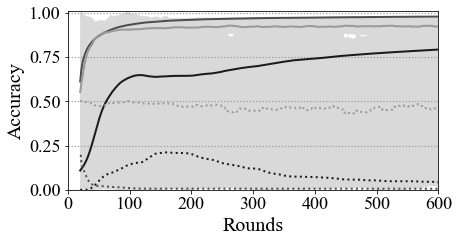

L2 Bounds:


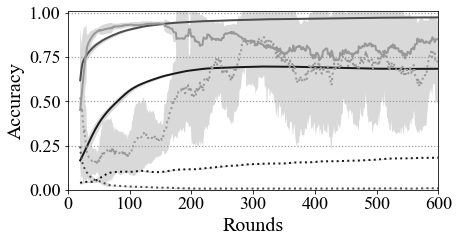

Legends:


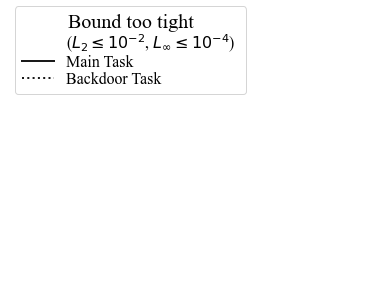

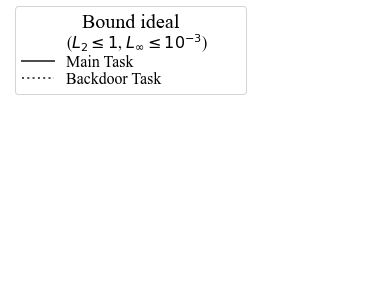

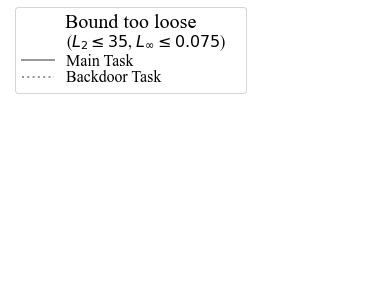

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `norm_accuracy_compare_plot_legend1.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `norm_accuracy_compare_plot_legend2.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `norm_accuracy_compare_plot_legend3.pdf'.
L8 Bounds:


Round  e41_clipinf_0_0001_evaluation/test_accuracy  \
9        10                                     0.102526   
19       20                                     0.156507   
29       30                                     0.253452   
39       40                                     0.396348   
49       50                                     0.488837   
59       60                                     0.541471   
69       70                                     0.595133   
79       80                                     0.619663   
89       90                                     0.637070   
99      100                                     0.648086   
109     110                                     0.648453   
119     120                                     0.643581   
129     130                                     0.637241   
139     140                                     0.638294   
149     150                                     0.640766   
159     160                                     0.642504   
169     170                                     0.643581   
179     180                                     0.645931   
189     190                                     0.642920   
199     200                                     0.652003   
209     210                                     0.655062   
219     220                                     0.657682   
229     230                                     0.658245   
239     240                                     0.668209   
249     250                                     0.678686   
259     260                                     0.681183   
269     270                                     0.687377   
279     280                                     0.694061   
289     290                                     0.696460   
299     300                                     0.698932   
309     310                                     0.708138   
319     320                                     0.713425   
329     330                                     0.718933   
339     340                                     0.724466   
349     350                                     0.729704   
359     360                                     0.734870   
369     370                                     0.735849   
379     380                                     0.739938   
389     390                                     0.742044   
399     400                                     0.745079   
409     410                                     0.748506   
419     420                                     0.752252   
429     430                                     0.756903   
439     440                                     0.759107   
449     450                                     0.762142   
459     460                                     0.764395   
469     470                                     0.768189   
479     480                                     0.770246   
489     490                                     0.771690   
499     500                                     0.774946   
509     510                                     0.776758   
519     520                                     0.778961   
529     530                                     0.781703   
539     540                                     0.783808   
549     550                                     0.785644   
559     560                                     0.787799   
569     570                                     0.790075   
579     580                                     0.791226   
589     590                                     0.793258   
599     600                                     0.795730   
609     610                                     0.797077   
619     620                                     0.799892   
629     630                                     0.801826   
639     640                                     0.803417   
649     650                                     0.805400   
659     660                                   

L2 Bounds:


Round  e41_clipinf_0_0001_evaluation/test_accuracy  \
9        10                                     0.102526   
19       20                                     0.156507   
29       30                                     0.253452   
39       40                                     0.396348   
49       50                                     0.488837   
59       60                                     0.541471   
69       70                                     0.595133   
79       80                                     0.619663   
89       90                                     0.637070   
99      100                                     0.648086   
109     110                                     0.648453   
119     120                                     0.643581   
129     130                                     0.637241   
139     140                                     0.638294   
149     150                                     0.640766   
159     160                                     0.642504   
169     170                                     0.643581   
179     180                                     0.645931   
189     190                                     0.642920   
199     200                                     0.652003   
209     210                                     0.655062   
219     220                                     0.657682   
229     230                                     0.658245   
239     240                                     0.668209   
249     250                                     0.678686   
259     260                                     0.681183   
269     270                                     0.687377   
279     280                                     0.694061   
289     290                                     0.696460   
299     300                                     0.698932   
309     310                                     0.708138   
319     320                                     0.713425   
329     330                                     0.718933   
339     340                                     0.724466   
349     350                                     0.729704   
359     360                                     0.734870   
369     370                                     0.735849   
379     380                                     0.739938   
389     390                                     0.742044   
399     400                                     0.745079   
409     410                                     0.748506   
419     420                                     0.752252   
429     430                                     0.756903   
439     440                                     0.759107   
449     450                                     0.762142   
459     460                                     0.764395   
469     470                                     0.768189   
479     480                                     0.770246   
489     490                                     0.771690   
499     500                                     0.774946   
509     510                                     0.776758   
519     520                                     0.778961   
529     530                                     0.781703   
539     540                                     0.783808   
549     550                                     0.785644   
559     560                                     0.787799   
569     570                                     0.790075   
579     580                                     0.791226   
589     590                                     0.793258   
599     600                                     0.795730   
609     610                                     0.797077   
619     620                                     0.799892   
629     630                                     0.801826   
639     640                                     0.803417   
649     650                                     0.805400   
659     660                                   

In [9]:
%run extract_histogram.py
%run plots.py

#fig = norm_accuracy_compare_plot("l2_norm_accuracy_compare_plot.pdf", "L2")
fig, df_l8 = norm_accuracy_compare_plot("norm_accuracy_compare_plot_l8", norm="l8", legend_type=None, use_error=True)
print("L8 Bounds:")
display(fig)

fig, df_l2 = norm_accuracy_compare_plot("norm_accuracy_compare_plot_l2", norm="l2", legend_type=None, use_error=True)
print("L2 Bounds:")
display(fig)

legend1, _ = norm_accuracy_compare_plot("norm_accuracy_compare_plot_legend1", norm="l8", legend_type="tootight", use_error=False)
legend2, _ = norm_accuracy_compare_plot("norm_accuracy_compare_plot_legend2", norm="l8", legend_type="ideal", use_error=False)
legend3, _ = norm_accuracy_compare_plot("norm_accuracy_compare_plot_legend3", norm="l8", legend_type="tooloose", use_error=False)

print("Legends:")
display(legend1)
display(legend2)
display(legend3)

# crop the legend
!pdfcrop norm_accuracy_compare_plot_legend1.pdf norm_accuracy_compare_plot_legend1.pdf

!pdfcrop norm_accuracy_compare_plot_legend2.pdf norm_accuracy_compare_plot_legend2.pdf

!pdfcrop norm_accuracy_compare_plot_legend3.pdf norm_accuracy_compare_plot_legend3.pdf

print("L8 Bounds:")
display(df_l8[df_l8["Round"]%10==0])

print("L2 Bounds:")
display(df_l2[df_l2["Round"]%10==0])


L8 Bounds:


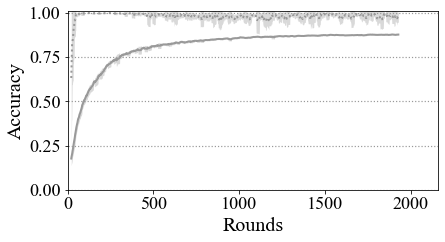

L2 Bounds:


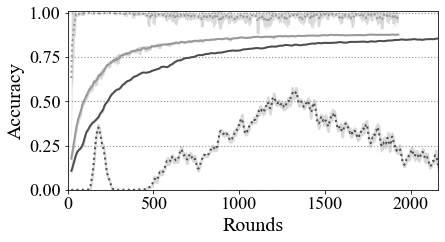

Legends:


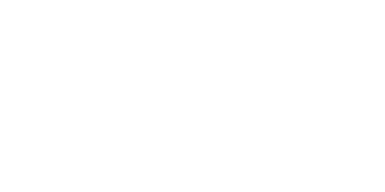

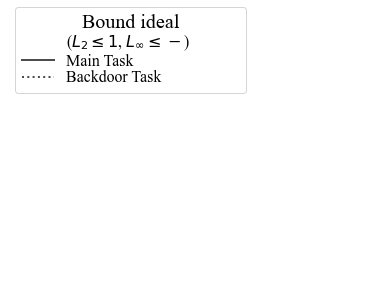

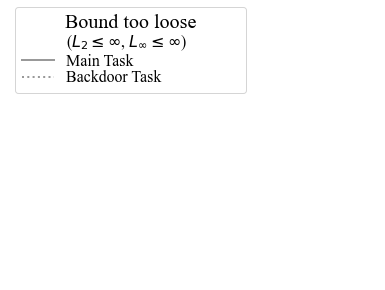

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.

!!! Warning: Empty Bounding Box is returned by Ghostscript!
!!!   Page 1: 0 0 0 0
!!! Either there is a problem with the page or with Ghostscript.
!!! Recovery is tried by embedding the page in its original size.

==> 1 page written on `norm_accuracy_compare_plot_legend1_cifar.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `norm_accuracy_compare_plot_legend2_cifar.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `norm_accuracy_compare_plot_legend3_cifar.pdf'.
L8 Bounds:


Round  e58_lr1_cifar_baseline_evaluation/test_accuracy  \
9        10                                         0.189291   
19       20                                         0.220740   
29       30                                         0.315884   
39       40                                         0.365645   
49       50                                         0.408340   
59       60                                         0.428045   
69       70                                         0.480096   
79       80                                         0.478105   
89       90                                         0.508061   
99      100                                         0.537520   
109     110                                         0.467357   
119     120                                         0.578722   
129     130                                         0.496517   
139     140                                         0.601612   
149     150                                         0.601015   
159     160                                         0.599423   
169     170                                         0.650478   
179     180                                         0.655951   
189     190                                         0.661823   
199     200                                         0.675259   
209     210                                         0.694367   
219     220                                         0.709494   
229     230                                         0.715068   
239     240                                         0.717158   
249     250                                         0.732086   
259     260                                         0.736565   
269     270                                         0.743929   
279     280                                         0.748806   
289     290                                         0.745223   
299     300                                         0.764331   
309     310                                         0.768014   
319     320                                         0.763933   
329     330                                         0.767416   
339     340                                         0.778364   
349     350                                         0.779160   
359     360                                         0.786525   
369     370                                         0.786127   
379     380                                         0.782444   
389     390                                         0.792795   
399     400                                         0.802150   
409     410                                         0.700239   
419     420                                         0.805036   
429     430                                         0.792894   
439     440                                         0.806628   
449     450                                         0.803244   
459     460                                         0.805434   
469     470                                         0.797373   
479     480                                         0.814192   
489     490                                         0.814391   
499     500                                         0.815386   
509     510                                         0.810012   
519     520                                         0.818471   
529     530                                         0.820661   
539     540                                         0.824244   
549     550                                         0.814391   
559     560                                         0.823547   
569     570                                         0.829021   
579     580                                         0.832404   
589     590                                         0.829021   
599     600                                         0.828623   
609     610                                         0.822651   
619     620                           

L2 Bounds:


Round  e58_lr1_cifar_baseline_evaluation/test_accuracy  \
9        10                                         0.189291   
19       20                                         0.220740   
29       30                                         0.315884   
39       40                                         0.365645   
49       50                                         0.408340   
59       60                                         0.428045   
69       70                                         0.480096   
79       80                                         0.478105   
89       90                                         0.508061   
99      100                                         0.537520   
109     110                                         0.467357   
119     120                                         0.578722   
129     130                                         0.496517   
139     140                                         0.601612   
149     150                                         0.601015   
159     160                                         0.599423   
169     170                                         0.650478   
179     180                                         0.655951   
189     190                                         0.661823   
199     200                                         0.675259   
209     210                                         0.694367   
219     220                                         0.709494   
229     230                                         0.715068   
239     240                                         0.717158   
249     250                                         0.732086   
259     260                                         0.736565   
269     270                                         0.743929   
279     280                                         0.748806   
289     290                                         0.745223   
299     300                                         0.764331   
309     310                                         0.768014   
319     320                                         0.763933   
329     330                                         0.767416   
339     340                                         0.778364   
349     350                                         0.779160   
359     360                                         0.786525   
369     370                                         0.786127   
379     380                                         0.782444   
389     390                                         0.792795   
399     400                                         0.802150   
409     410                                         0.700239   
419     420                                         0.805036   
429     430                                         0.792894   
439     440                                         0.806628   
449     450                                         0.803244   
459     460                                         0.805434   
469     470                                         0.797373   
479     480                                         0.814192   
489     490                                         0.814391   
499     500                                         0.815386   
509     510                                         0.810012   
519     520                                         0.818471   
529     530                                         0.820661   
539     540                                         0.824244   
549     550                                         0.814391   
559     560                                         0.823547   
569     570                                         0.829021   
579     580                                         0.832404   
589     590                                         0.829021   
599     600                                         0.828623   
609     610                                         0.822651   
619     620                           

In [10]:
%run extract_histogram.py
%run plots.py

xmax = 2163

fig, df_l8 = norm_accuracy_compare_plot("norm_accuracy_compare_plot_l8_cifar", norm="l8", legend_type=None, use_error=True, model="cifar", xmax=xmax)
print("L8 Bounds:")
display(fig)

fig, df_l2 = norm_accuracy_compare_plot("norm_accuracy_compare_plot_l2_cifar", norm="l2", legend_type=None, use_error=True, model="cifar", xmax=xmax)
print("L2 Bounds:")
display(fig)

legend1, _ = norm_accuracy_compare_plot("norm_accuracy_compare_plot_legend1_cifar", norm="l2", legend_type="tootight", use_error=False, model="cifar", xmax=xmax)
legend2, _ = norm_accuracy_compare_plot("norm_accuracy_compare_plot_legend2_cifar", norm="l2", legend_type="ideal", use_error=False, model="cifar", xmax=xmax)
legend3, _ = norm_accuracy_compare_plot("norm_accuracy_compare_plot_legend3_cifar", norm="l2", legend_type="tooloose", use_error=False, model="cifar", xmax=xmax)

print("Legends:")
display(legend1)
display(legend2)
display(legend3)

# crop the legend
!pdfcrop norm_accuracy_compare_plot_legend1_cifar.pdf norm_accuracy_compare_plot_legend1_cifar.pdf

!pdfcrop norm_accuracy_compare_plot_legend2_cifar.pdf norm_accuracy_compare_plot_legend2_cifar.pdf

!pdfcrop norm_accuracy_compare_plot_legend3_cifar.pdf norm_accuracy_compare_plot_legend3_cifar.pdf

print("L8 Bounds:")
display(df_l8[df_l8["Round"]%10==0])

print("L2 Bounds:")
display(df_l2[df_l2["Round"]%10==0])

L2 Bound Figure:


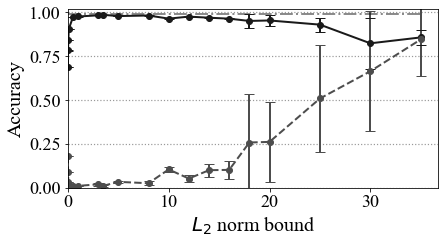

Skipped (ignored): e41_clipinf_0_03_evaluation/test_accuracy
Skipped (ignored): e41_clipinf_0_03_evaluation/adv_success
Skipped: e41_clipinf_0_00005_2_evaluation/test_accuracy
Skipped: e41_clipinf_0_00005_2_evaluation/adv_success
L8 Bound Figure:


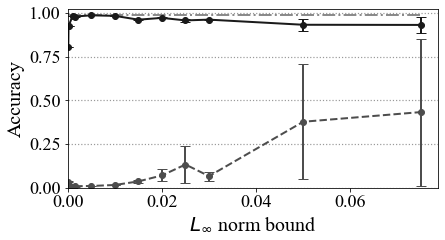

Skipped (ignored): e41_clipinf_0_03_evaluation/test_accuracy
Skipped (ignored): e41_clipinf_0_03_evaluation/adv_success
Skipped: e41_clipinf_0_00005_2_evaluation/test_accuracy
Skipped: e41_clipinf_0_00005_2_evaluation/adv_success


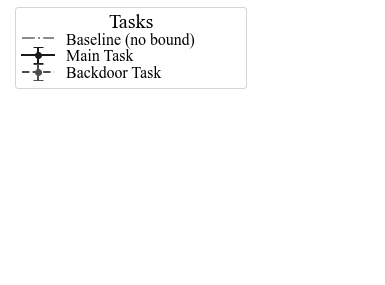

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `norm_accuracy_tradeoff_plot_legend.pdf'.
L2 Bound Data:


round norm   bound  test_accuracy_mean  test_accuracy_std  \
0     670   l2   0.010            0.686660           0.000217   
1     670   l2   0.025            0.783232           0.000986   
2     670   l2   0.050            0.844262           0.000844   
3     670   l2   0.100            0.906110           0.000620   
4     670   l2   0.500            0.972157           0.000299   
5     670   l2   1.000            0.977089           0.000320   
6     670   l2   3.000            0.983685           0.000544   
7     670   l2   3.500            0.986758           0.000255   
8     670   l2   5.000            0.979518           0.000927   
9     670   l2   8.000            0.982782           0.000474   
10    670   l2  10.000            0.964984           0.005034   
11    670   l2  12.000            0.976380           0.001007   
12    670   l2  14.000            0.970155           0.002926   
13    670   l2  16.000            0.964739           0.004199   
14    670   l2  18.000            0.951723           0.039702   
15    670   l2  20.000            0.954408           0.033785   
16    670   l2  25.000            0.930594           0.039751   
17    670   l2  30.000            0.823878           0.144048   
18    670   l2  35.000            0.857584           0.043274   

    adv_success_mean  adv_success_std  baseline_mean  baseline_std  
0           0.180645     0.000000e+00       0.989269      0.000155  
1           0.087097     3.502109e-09       0.989269      0.000155  
2           0.031129     1.578582e-03       0.989269      0.000155  
3           0.016129     0.000000e+00       0.989269      0.000155  
4           0.006452     0.000000e+00       0.989269      0.000155  
5           0.009194     1.181766e-03       0.989269      0.000155  
6           0.018065     7.129113e-03       0.989269      0.000155  
7           0.009355     3.901970e-03       0.989269      0.000155  
8           0.032258     6.619215e-03       0.989269      0.000155  
9           0.024355     1.158244e-02       0.989269      0.000155  
10          0.103226     1.468959e-02       0.989269      0.000155  
11          0.051129     1.804495e-02       0.989269      0.000155  
12          0.098871     3.797081e-02       0.989269      0.000155  
13          0.100806     5.223390e-02       0.989269      0.000155  
14          0.257097     2.786409e-01       0.989269      0.000155  
15          0.260645     2.286783e-01       0.989269      0.000155  
16          0.508548     3.035945e-01       0.989269      0.000155  
17          0.664355     3.424532e-01       0.989269      0.000155  
18          0.846129     2.072964e-01       0.989269      0.000155

L8 Bound Data:


round norm    bound  test_accuracy_mean  test_accuracy_std  \
0     670   l8  0.00010            0.806067           0.000876   
1     670   l8  0.00015            0.923160           0.000593   
2     670   l8  0.00100            0.980889           0.000182   
3     670   l8  0.00150            0.978587           0.000421   
4     670   l8  0.00500            0.985520           0.000348   
5     670   l8  0.01000            0.982415           0.000311   
6     670   l8  0.01500            0.960662           0.002896   
7     670   l8  0.02000            0.970859           0.002282   
8     670   l8  0.02500            0.956478           0.008703   
9     670   l8  0.03000            0.960849           0.004230   
10    670   l8  0.05000            0.931590           0.035355   
11    670   l8  0.07500            0.930664           0.044036   

    adv_success_mean  adv_success_std  baseline_mean  baseline_std  
0           0.035839     1.122536e-03       0.989269      0.000155  
1           0.016129     0.000000e+00       0.989269      0.000155  
2           0.006452     3.910496e-09       0.989269      0.000155  
3           0.009032     1.687575e-03       0.989269      0.000155  
4           0.010484     1.774579e-03       0.989269      0.000155  
5           0.016129     1.480102e-03       0.989269      0.000155  
6           0.036613     7.989465e-03       0.989269      0.000155  
7           0.070645     3.455173e-02       0.989269      0.000155  
8           0.133065     1.076863e-01       0.989269      0.000155  
9           0.066623     2.598280e-02       0.989269      0.000155  
10          0.377360     3.284544e-01       0.989269      0.000155  
11          0.432576     4.196156e-01       0.989269      0.000155

In [11]:
%run extract_histogram.py
%run plots.py

fig, df_l2 = norm_accuracy_tradeoff_plot(plotname="norm_accuracy_tradeoff_plot_l2", norm="l2", xtickspacing=10, add_legend=False)
print("L2 Bound Figure:")
display(fig)

fig, df_l8 = norm_accuracy_tradeoff_plot(plotname="norm_accuracy_tradeoff_plot_l8", norm="l8", xtickspacing=0.02, add_legend=False)
print("L8 Bound Figure:")
display(fig)

leg, _ = norm_accuracy_tradeoff_plot(plotname="norm_accuracy_tradeoff_plot_legend", norm="l8", xtickspacing=0.02, add_legend=True)
display(leg)

# crop the legend
!pdfcrop norm_accuracy_tradeoff_plot_legend.pdf norm_accuracy_tradeoff_plot_legend.pdf

print("L2 Bound Data:")
display(df_l2)

print("L8 Bound Data:")
display(df_l8)


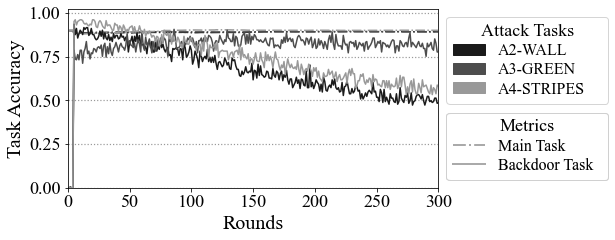

round  a2-wall_testacc  a3-green_testacc  a4-stripes_testacc  \
0        1         0.898690          0.898185            0.898438   
1        2         0.898690          0.898185            0.898926   
2        3         0.898690          0.897681            0.899902   
3        4         0.898690          0.897681            0.900391   
4        5         0.883569          0.885081            0.876465   
5        6         0.883569          0.885081            0.875977   
6        7         0.884073          0.885081            0.876465   
7        8         0.883569          0.885585            0.876465   
8        9         0.884073          0.886089            0.877441   
9       10         0.884577          0.886089            0.877930   
10      11         0.884073          0.886089            0.878418   
11      12         0.884073          0.885585            0.878906   
12      13         0.884073          0.885585            0.879883   
13      14         0.884073          0.886089            0.880371   
14      15         0.884073          0.885585            0.880371   
15      16         0.883569          0.886089            0.880859   
16      17         0.883569          0.886089            0.880859   
17      18         0.884073          0.887097            0.881348   
18      19         0.884073          0.887601            0.881348   
19      20         0.884073          0.887601            0.881348   
20      21         0.884073          0.887601            0.881836   
21      22         0.884577          0.888609            0.882324   
22      23         0.884577          0.888609            0.882324   
23      24         0.884577          0.888105            0.882812   
24      25         0.884073          0.888105            0.882812   
25      26         0.883569          0.888105            0.883301   
26      27         0.883569          0.888105            0.883789   
27      28         0.884577          0.888609            0.883789   
28      29         0.884577          0.889113            0.883789   
29      30         0.885081          0.889113            0.884277   
30      31         0.885081          0.889113            0.884766   
31      32         0.885081          0.889113            0.885742   
32      33         0.885081          0.889113            0.886230   
33      34         0.885081          0.889113            0.886230   
34      35         0.885081          0.889113            0.885742   
35      36         0.885585          0.890121            0.885254   
36      37         0.885585          0.891129            0.885254   
37      38         0.885081          0.891129            0.886719   
38      39         0.886089          0.891129            0.887207   
39      40         0.886089          0.891633            0.888184   
40      41         0.885585          0.891129            0.889160   
41      42         0.886593          0.891129            0.889160   
42      43         0.886593          0.890625            0.889648   
43      44         0.886593          0.891129            0.889648   
44      45         0.886593          0.891633            0.891113   
45      46         0.886593          0.891633            0.891113   
46      47         0.886089          0.890121            0.890137   
47      48         0.885585          0.890121            0.890625   
48      49         0.886089          0.890121            0.890137   
49      50         0.885081          0.890625            0.890625   
50      51         0.885081          0.890121            0.890625   
51      52         0.885081          0.890121            0.890137   
52      53         0.886089          0.891129            0.890625   
53      54         0.886089          0.890625            0.890625   
54      55         0.885585          0.890625            0.891602   
55      56         0.885585          0.890625            0.892090   
56      57         0.886089          0.890625            0.891602   
57 

In [12]:
# cifar model replacement

%run extract_histogram.py
%run plots.py

fig, df = modelreplacement_cifar_plot("modelreplacement_cifar")

display(fig)

display(df[df["round"]<=300])

Ignore file: cifar_lenet_minloss_wr_bgwall_30.csv with n_clients=30
Ignore file: cifar_lenet_minloss_wr_greencar_30.csv with n_clients=30
Ignore file: cifar_lenet_minloss_wr_racingstripes_30.csv with n_clients=30


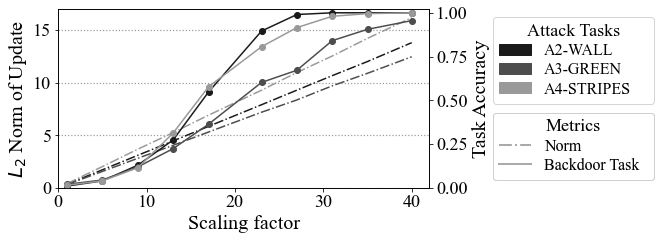

scaling_factor  n_clients  a2-wall_bdoor  a2-wall_l2norm  a3-green_bdoor  \
0               1         40       0.009950        0.343513        0.019900   
1               5         40       0.039801        1.714733        0.044776   
2               9         40       0.129353        3.089593        0.119403   
3              13         40       0.273632        4.457260        0.223881   
4              17         40       0.547264        5.839682        0.363184   
5              23         40       0.895522        7.894639        0.601990   
6              27         40       0.990050        9.280039        0.671642   
7              31         40       1.000000       10.657923        0.840796   
8              35         40       1.000000       12.004683        0.905473   
9              40         40       1.000000       13.795316        0.955224   

   a3-green_l2norm  a4-stripes_bdoor  a4-stripes_l2norm  alpha_fracadv  
0         0.313420          0.014925           0.405354          0.025  
1         1.559536          0.039801           2.021766          0.025  
2         2.806004          0.114428           3.670761          0.025  
3         4.041840          0.313433           5.251290          0.025  
4         5.300505          0.577114           6.903742          0.025  
5         7.183391          0.805970           9.275148          0.025  
6         8.350116          0.915423          10.959595          0.025  
7         9.688821          0.980099          12.524423          0.025  
8        10.885862          0.995025          14.206391          0.025  
9        12.454804          1.000000          16.175232          0.025

In [13]:
# scaling factor adv success
%run extract_histogram.py
%run plots.py

fig, df = scaling_factor_adv_success("scaling_factor_adv_success")

display(fig)

display(df)


Ignore file: cifar_lenet_minloss_wr_bgwall_30.csv with n_clients=30
Ignore file: cifar_lenet_minloss_wr_greencar_30.csv with n_clients=30
Ignore file: cifar_lenet_minloss_wr_racingstripes_30.csv with n_clients=30


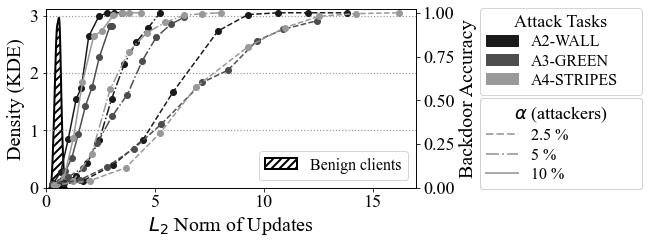

scaling_factor  n_clients  a2-wall_bdoor  a2-wall_l2norm  a3-green_bdoor  \
0               1         10       0.024876        0.349435        0.004975   
1               2         10       0.089552        0.694742        0.034826   
2               3         10       0.278607        1.041908        0.094527   
3               4         10       0.507463        1.404545        0.169154   
4               5         10       0.572139        1.639700        0.308458   
5               6         10       0.865672        1.980283        0.467662   
6               7         10       0.980099        2.445170        0.577114   
7               8         10       1.000000        2.825205        0.746269   
8               9         10       1.000000        3.132684        0.925373   
9              10         10       1.000000        3.523682        0.925373   
0               1         20       0.009950        0.275704        0.009950   
1               3         20       0.029851        0.829402        0.059701   
2               5         20       0.064677        1.376028        0.114428   
3               7         20       0.144279        1.913845        0.258706   
4               9         20       0.273632        2.465408        0.407960   
5              11         20       0.507463        3.025349        0.532338   
6              13         20       0.706468        3.605214        0.726368   
7              15         20       0.830846        4.145988        0.860696   
8              17         20       0.915423        4.703600        0.935323   
9              19         20       1.000000        5.255793        0.975124   
0               1         40       0.009950        0.343513        0.019900   
1               5         40       0.039801        1.714733        0.044776   
2               9         40       0.129353        3.089593        0.119403   
3              13         40       0.273632        4.457260        0.223881   
4              17         40       0.547264        5.839682        0.363184   
5              23         40       0.895522        7.894639        0.601990   
6              27         40       0.990050        9.280039        0.671642   
7              31         40       1.000000       10.657923        0.840796   
8              35         40       1.000000       12.004683        0.905473   
9              40         40       1.000000       13.795316        0.955224   

   a3-green_l2norm  a4-stripes_bdoor  a4-stripes_l2norm  alpha_fracadv  
0         0.305151          0.014925           0.424187          0.100  
1         0.606770          0.059701           0.849055          0.100  
2         0.908223          0.283582           1.276553          0.100  
3         1.199532          0.601990           1.691250          0.100  
4         1.506534          0.865672           2.205295          0.100  
5         1.830893          0.895522           2.566751          0.100  
6         2.139165          0.985075           3.095835          0.100  
7         2.465828          1.000000           3.493771          0.100  
8         2.953613          1.000000           3.808505          0.100  
9         3.042849          1.000000           4.382433          0.100  
0         0.339498          0.004975           0.425594          0.050  
1         1.015056          0.039801           1.267735          0.050  
2         1.707975          0.194030           2.115743          0.050  
3         2.380544          0.562189           2.957762          0.050  
4         3.047390          0.776119           3.804292          0.050  
5         3.745332          0.885572           4.636006          0.050  
6         4.433204          0.945274           5.490739          0.050  
7         5.075445          0.985075           6.328959          0.050  
8         5.746287          0.995025           7.153730          0.050  
9         6.365763          1.000000           8.058998          0.050  
0         0.313420  

In [14]:
# norm distribution benign
%run extract_histogram.py
%run plots.py


fig, df = norm_distribution_benign(plotname="norm_distribution_benign")

display(fig)

display(df)